## 5. naloga: Hitra Fourierova transformacija in korelacijske funkcije

Naloga: Na spletni strani MF praktikuma najdeˇs posnetke oglaˇsanja velike uharice, naˇse najveˇcje
sove. Posneti sta dve sovi z minimalnim ozadjem (bubomono in bubo2mono) in nekaj meˇsanih signalov,
ki zakrivajo njuno oglaˇsanje (mix, mix1, mix2 in mix22). V signalih mix2 in mix22 je oglaˇsanje sove
komaj ˇse zaznavno. Izraˇcunaj avtokorelacijsko funkcijo vseh signalov in poskusi ugotoviti, za katero
sovo gre pri teh najbolj zaˇsumljenih signalih!
Poglejte si rutine four1 iz Numerical Recipes ali knjiˇznice fftw3, ki je ˇse dosti hitrejˇsa. V okolju
Python so te rutine vkljuˇcene v ’fft’ paket. (Pri tako velikih vzorcih je skorajda nujno uporabiti FFT
namesto poˇcasne navadne DFT.)

Dodatna naloga: Izraˇcunaj ˇse avtokorelacijsko funkcijo za kak signal, ki ga posnameˇs sam ali za kak
proces, za katerega sam poiˇsˇceˇs ustrezne podatke.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import axes as ax
import numpy as np
import scipy.optimize as opt
from scipy import special
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time
from numpy import fft


In [59]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [4]:
def cor(Fk, Gk):
    l = len(Fk)
    nn = np.arange(0, 2*l)

    Fk = np.concatenate((Fk, np.zeros(l)))
    Gk = np.concatenate((Gk, np.zeros(l)))
    
    return fft.ifft(fft.ifftshift(Fk)*nn * np.conj(fft.ifftshift(Gk))*nn) * 1/(-nn +l)

def cor_per(Fk, Gk):
    l = len(Fk)
    nn = np.arange(0, 2*l)

    Fk = np.concatenate((Fk, np.zeros(l)))
    Gk = np.concatenate((Gk, np.zeros(l)))
    
    return fft.ifft(fft.ifftshift(Fk)*nn * np.conj(fft.ifftshift(Gk))*nn) * 1/(l)

def cor(fx, gx):
    l = len(fx)
    nn = np.arange(0, 2*l)

    fx = np.concatenate((fx, np.zeros(l)))
    gx = np.concatenate((gx, np.zeros(l)))
    
    #Fk = fft.fft(fx)
    #print(1/(l - np.abs(nn[l] - nn) +0.1))
    return fft.ifftshift(fft.ifft(fft.fft(fx) * np.conj(fft.fft(gx)))) * 1/(l - np.abs(nn[l] - nn) +0.1)
    #return (fft.ifft(Fk * np.conj(fft.fft(gx))))[0:len(Fk)//2] * 1/(l - nn)[0:len(Fk)//2]
    

In [5]:
def correlate2(g, h):  # Simple and quick version
    N = g.shape[0]
    g = np.concatenate((g, np.zeros(N)))
    h = np.concatenate((h, np.zeros(N)))
    n = np.arange(0, 2*N)

    G = np.fft.fft(g)
    H = np.fft.fft(h)
    p = G * np.conj(H)
    pi = 1/N*np.fft.ifft(p)
    return n, np.real(np.fft.ifftshift(pi))

# vir: kolega

In [7]:
bubo2mono = np.loadtxt('bubo2mono.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
bubomono = np.loadtxt('bubomono.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
bubo2mono = np.concatenate((bubo2mono, [0]))
mix = np.loadtxt('mix.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
mix1 = np.loadtxt('mix1.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
mix2 = np.loadtxt('mix2.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
mix22 = np.loadtxt('mix22.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)

print(len(bubomono), len(bubo2mono), len(mix), len(mix1), len(mix2), len(mix22))


220502 220502 220502 220502 220502 220502


## Čiščenje

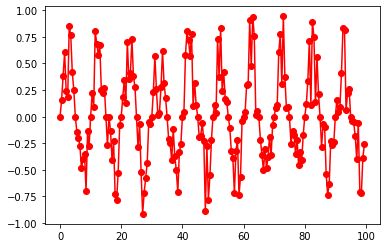

400


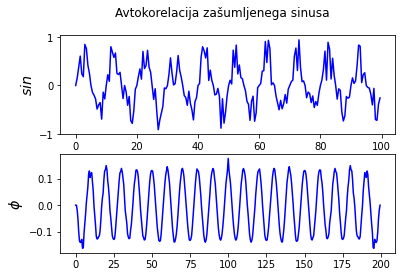

In [24]:
plt.ion()

n = 200 # Number of data points
dx = 0.5 # Sampling period (in meters)
x = dx*np.arange(0,n) # x coordinates
w1 = 10.0 # sine wavelength (meters) 
fx = np.sin(2*np.pi*x/w1)#*np.sin(2*np.pi*x/w1+25) # signal
fx = np.multiply(fx,np.random.rand(n))
Fk = fft.fft(fx)/n # Fourier coefficients (divided by n)
nu = fft.fftfreq(n,dx) # Natural frequencies
Fk = fft.fftshift(Fk) # Shift zero freq to center
nu = fft.fftshift(nu) # Shift zero freq to center

plt.plot(x,fx.real,'r-o')

plt.show()





#plt.cla()
f, ax = plt.subplots(2, 1)
# Plot Cosine terms
ax[0].plot(x, np.real(fft.ifft(fft.ifftshift(Fk)*n)),color='b')
ax[0].set_ylabel(r'$sin$', size = 'x-large')




#fi = fft.ifft(np.abs(fft.ifftshift(Fk)*n)**2) * 1/(-x +n*dx)
fi = cor(fx, fx)

print(len(fi))



#plt.cla()

# Plot Cosine terms
ax[1].plot(np.arange(len(fi))/2, np.real(fi),color='b')
ax[1].set_ylabel(r'$\phi $', size = 'x-large')

f.suptitle("Avtokorelacija zašumljenega sinusa")
#plt.savefig('sin.png')
plt.show()

# f, ax = plt.subplots()
# # Plot Cosine terms
# ax.plot(correlate2(fx, fx)[0], correlate2(fx, fx)[1],color='b')
# ax.set_ylabel(r'$Re[F_k]$', size = 'x-large')

# f.suptitle("FFT")
# plt.show()

sampling freq: 44100.4
critical freq: 22050.2
220502 nu
[438 452 475 ... 424 422 426]
220502
[-0.40183673+2.56739074e-15j -0.41787228+8.81894341e-03j
 -0.39479623+8.29790443e-03j ... -0.3909764 -1.68217720e-02j
 -0.39479623-8.29790443e-03j -0.41787228-8.81894341e-03j]
441004


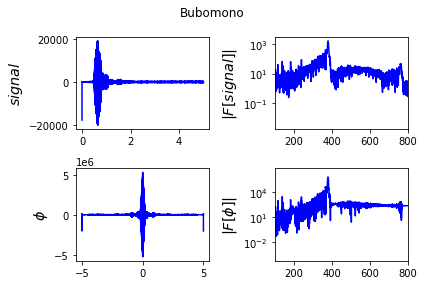

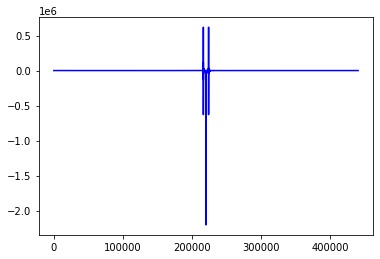

In [32]:
f, ax = plt.subplots(2,2)

T = 5.0
dt = T/len(bubomono)
tmin=0.
tmax=dt*len(bubomono)
print("sampling freq:",1./dt)
nuc=1/2/dt
print("critical freq:",nuc)

nu= np.linspace(-nuc,nuc,len(bubomono),endpoint=False)
print(len(nu), "nu")

rol = np.roll(bubomono,int(len(bubomono)*(-0.3)))
print(rol)
print(len(rol))

t = np.array([i for i in range(len(bubomono))])/44100
ax[0,0].plot(t, bubomono,color='b')
#ax[0].plot(t, rol,color='r')
ax[0,0].set_ylabel(r'$signal$', size = 'x-large')

four = fft.fftshift(fft.fft( bubomono/44100))
print(four)

ax[0,1].plot(nu, np.abs(four),color='b')
ax[0,1].set_ylabel(r'$|F[signal]|$', size = 'x-large')
ax[0,1].set_xlim(100,800)
ax[0,1].set_yscale('log')


ax[1,0].plot(np.array([i for i in range(len(cor(bubomono, bubomono)))])/44100- len(cor(bubomono, bubomono))/44100/2, np.real(cor(bubomono, bubomono)),color='b')
ax[1,0].set_ylabel(r'$\phi$', size = 'x-large')


nu= np.linspace(-nuc,nuc,len(bubomono)*2,endpoint=False)
four = fft.fftshift(fft.fft(cor(bubomono, bubomono)/44100- len(cor(bubomono, bubomono))/44100/2))
print(len(four))

ax[1,1].plot(nu, np.abs(four),color='b')
ax[1,1].set_ylabel(r'$|F[\phi]|$', size = 'x-large')
ax[1,1].set_xlim(100,800)
#ax[1,1].set_ylim(0,10**6*0.75)

ax[1,1].set_yscale('log')
f.suptitle("Bubomono")
plt.tight_layout()
#plt.savefig('sova_cista.png')
plt.show()



sampling freq: 44100.4
critical freq: 22050.2
220502 nu
[10515 10526 11607 ...  9790 11324 11228]
220502
[-1.08260771+1.82076576e-14j -1.02421423-5.98563502e-01j
 -0.07483772-2.09121183e+00j ... -0.00815016+3.52454859e-01j
 -0.07483772+2.09121183e+00j -1.02421423+5.98563502e-01j]
220502


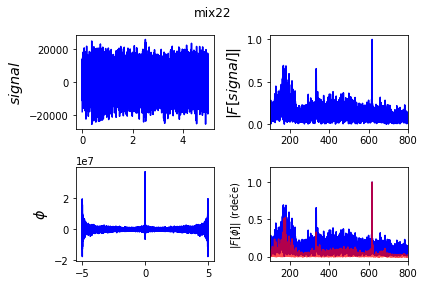

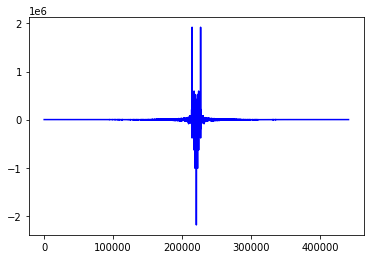

In [46]:
f, ax = plt.subplots(2,2)

T = 5.0
dt = T/len(mix22)
tmin=0.
tmax=dt*len(mix22)
print("sampling freq:",1./dt)
nuc=1/2/dt
print("critical freq:",nuc)

nu= np.linspace(-nuc,nuc,len(mix22),endpoint=False)
print(len(nu), "nu")

rol = np.roll(mix22,int(len(mix22)*(-0.3)))
print(rol)
print(len(rol))

t = np.array([i for i in range(len(mix22))])/44100
ax[0,0].plot(t, mix22,color='b')
#ax[0].plot(t, rol,color='r')
ax[0,0].set_ylabel(r'$signal$', size = 'x-large')

four = fft.fftshift(fft.fft( mix22/44100))
print(four)

ax[0,1].plot(nu, np.abs(four)/np.max(np.abs(four)[np.where((100 < nu) & (nu < 800))]),color='b')
ax[0,1].set_ylabel(r'$|F[signal]|$', size = 'x-large')
ax[0,1].set_xlim(100,800)
#ax[0,1].set_yscale('log')


ax[1,0].plot(np.array([i for i in range(len(cor(mix22, mix22)))])/44100- len(cor(mix22, mix22))/44100/2, np.real(cor(mix22, mix22)),color='b')
ax[1,0].set_ylabel(r'$\phi$', size = 'x-large')


nu1= np.linspace(-nuc,nuc,len(mix22)*2,endpoint=False)
four1 = fft.fftshift(fft.fft(cor(mix22, mix22)/44100- len(cor(mix22, mix22))/44100/2))
print(len(four))
#four = np.concatenate((four, np.zeros(1002)))
#four = four[:220503]

ax[1,1].plot(nu, np.abs(four)/np.max(np.abs(four)[np.where((100 < nu) & (nu < 800))]),color='b')
ax[1,1].plot(nu1, np.abs(four1)/np.max(np.abs(four1)[np.where((100 < nu1) & (nu1 < 800))]),color='r', alpha=0.7)
ax[1,1].set_ylabel(r'$|F[\phi]|$ (rdeče)')
ax[1,1].set_xlim(100,800)
#ax[1,1].set_ylim(0,10**6*0.75)

#ax[1,1].set_yscale('log')
f.suptitle("mix22")
plt.tight_layout()
#plt.savefig('razsumljanje.png')
plt.show()

plt.plot(np.array([i for i in range(len(four1))]), np.real(four1),color='b')
plt.show()

## Identifikacija sove

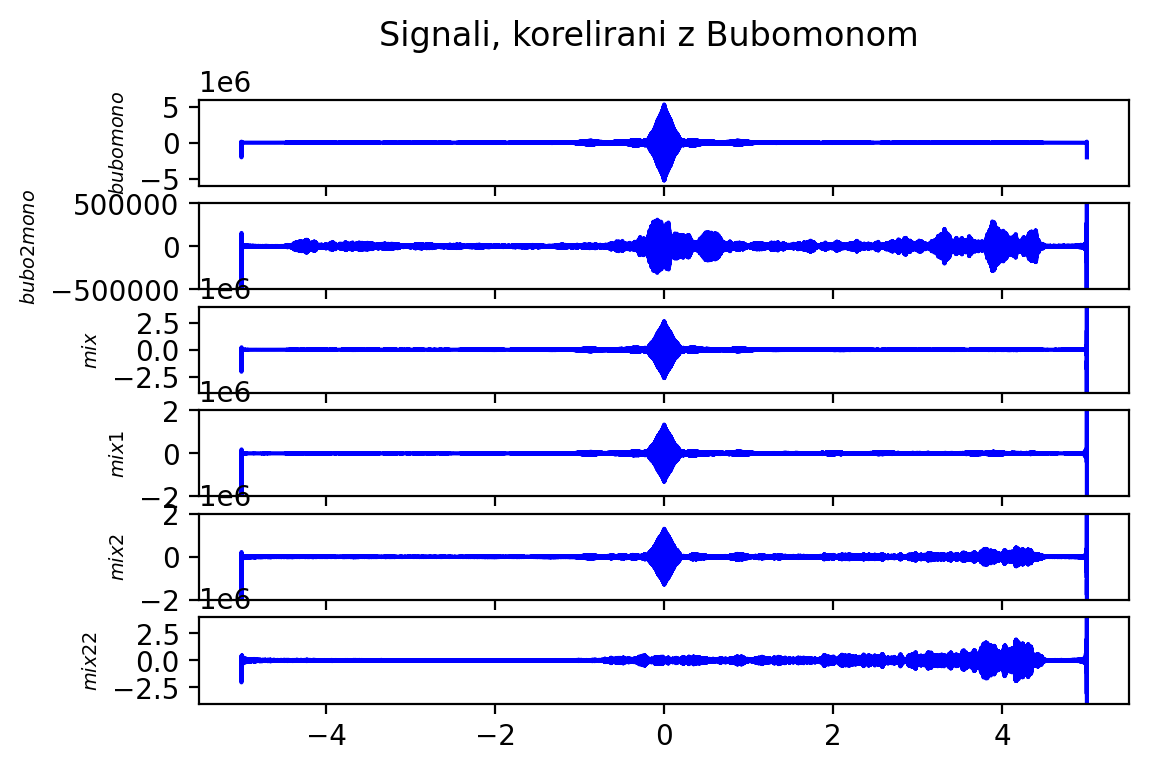

In [56]:
f, ax = plt.subplots(6,1,sharex=True)



# t = np.array([i for i in range(len(bubomono))])/44100
# ax[0].plot(t, bubomono,color='b')
# ax[0].plot(t, rol,color='r')
# ax[0].set_ylabel(r'$Re[F_k]$', size = 'x-large')


# ax[1].plot([i for i in range(len(cor(bubomono, bubomono)))], np.real(cor(bubomono, bubomono)) - np.real(cor(bubomono, bubomono)),color='b')
# ax[1].set_ylabel(r'$Re[F_k]$', size = 'x-large')

prime = cor(bubomono, bubomono)

ax[0].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[0].set_ylabel(r'$bubomono$', size = 'x-small')
ax[0].set_ylim(-6*10**6, 6*10**6 )

prime = cor(bubo2mono, bubomono)

ax[1].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[1].set_ylabel(r'$bubo2mono$', size = 'x-small')
ax[1].set_ylim(-0.5*10**6, 0.5*10**6 )

prime = cor(mix, bubomono)

ax[2].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[2].set_ylabel(r'$mix$', size = 'x-small')
ax[2].set_ylim(-4*10**6, 4*10**6 )

prime = cor(mix1, bubomono)

ax[3].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[3].set_ylabel(r'$mix1$', size = 'x-small')
ax[3].set_ylim(-2*10**6, 2*10**6 )

prime = cor(mix2, bubomono)

ax[4].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[4].set_ylabel(r'$mix2$', size = 'x-small')
ax[4].set_ylim(-2*10**6, 2*10**6 )

prime = cor(mix22, bubomono)

ax[5].plot(np.array([i for i in range(len(prime))])/44100- len(cor(bubomono, rol))/44100/2, np.real(prime),color='b')
ax[5].set_ylabel(r'$mix22$', size = 'x-small')
ax[5].set_ylim(-4*10**6, 4*10**6 )

f.suptitle("Signali, korelirani z Bubomonom")
#plt.tight_layout()
#plt.savefig('bubomono.png')
plt.show()

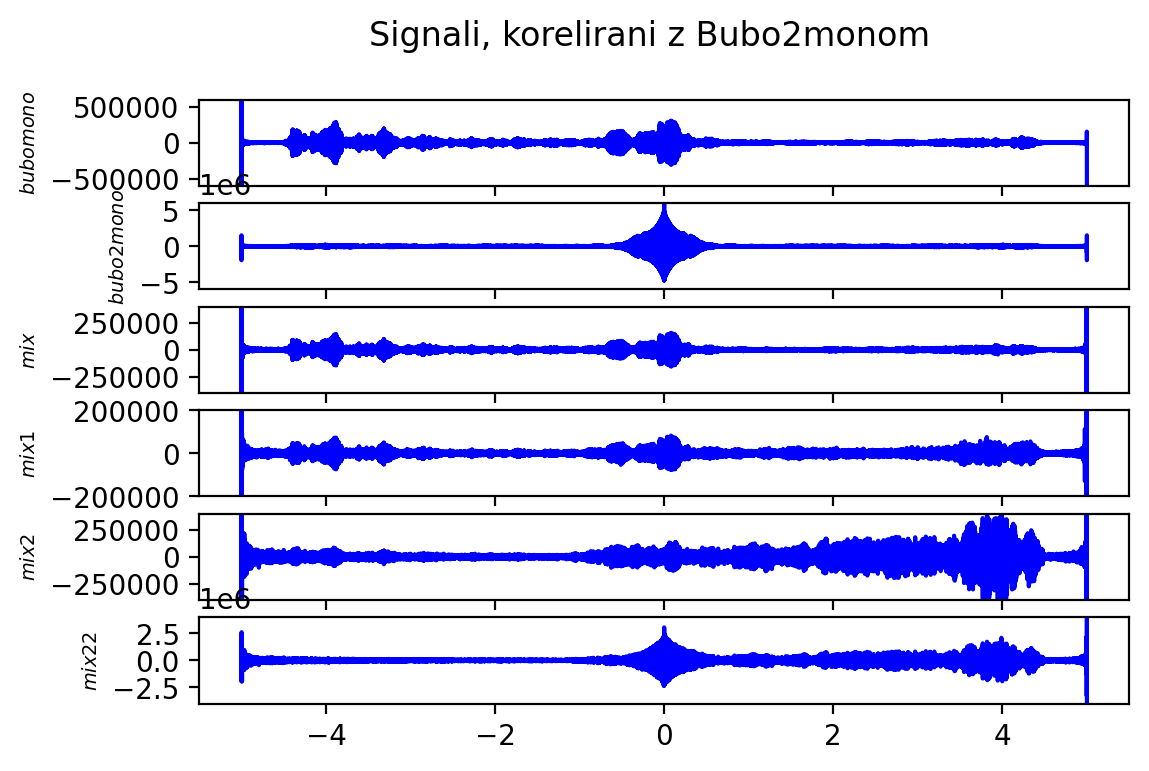

In [58]:
f, ax = plt.subplots(6,1,sharex=True)



# t = np.array([i for i in range(len(bubomono))])/44100
# ax[0].plot(t, bubomono,color='b')
# ax[0].plot(t, rol,color='r')
# ax[0].set_ylabel(r'$Re[F_k]$', size = 'x-large')


# ax[1].plot([i for i in range(len(cor(bubomono, bubomono)))], np.real(cor(bubomono, bubomono)) - np.real(cor(bubomono, bubomono)),color='b')
# ax[1].set_ylabel(r'$Re[F_k]$', size = 'x-large')

prime = cor(bubomono, bubo2mono)

ax[0].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[0].set_ylabel(r'$bubomono$', size = 'x-small')
ax[0].set_ylim(-6*10**5, 6*10**5 )

prime = cor(bubo2mono, bubo2mono)

ax[1].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[1].set_ylabel(r'$bubo2mono$', size = 'x-small')
ax[1].set_ylim(-6*10**6, 6*10**6 )

prime = cor(mix, bubo2mono)

ax[2].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[2].set_ylabel(r'$mix$', size = 'x-small')
ax[2].set_ylim(-4*10**5, 4*10**5 )

prime = cor(mix1, bubo2mono)

ax[3].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[3].set_ylabel(r'$mix1$', size = 'x-small')
ax[3].set_ylim(-2*10**5, 2*10**5 )

prime = cor(mix2, bubo2mono)

ax[4].plot(np.array([i for i in range(len(prime))])/44100- len(prime)/44100/2, np.real(prime),color='b')
ax[4].set_ylabel(r'$mix2$', size = 'x-small')
ax[4].set_ylim(-4*10**5, 4*10**5 )

prime = cor(mix22, bubo2mono)

ax[5].plot(np.array([i for i in range(len(prime))])/44100- len(cor(bubomono, rol))/44100/2, np.real(prime),color='b')
ax[5].set_ylabel(r'$mix22$', size = 'x-small')
ax[5].set_ylim(-4*10**6, 4*10**6 )

f.suptitle("Signali, korelirani z Bubo2monom")
#plt.tight_layout()
#plt.savefig('bubo2mono.png')
plt.show()

In [14]:
print(prime)

[-3.33786011e-04-1.90734863e-04j -7.36931698e-06+2.16738913e-06j
 -1.94426667e+06-1.69554455e-05j ...  1.96480355e+07+5.27758710e-06j
  1.04185543e+07+1.41206383e-06j -1.62368400e+07+1.83512733e-05j]


## Časovna zahtevnost

In [15]:
import scipy.fft

In [16]:
def DFT(h):
    N = len(h)
    n = np.linspace(-N/2, N/2, num=N, endpoint=False)
    k = np.linspace(0, N - 1, num=N)
    #Hn = np.multiply(h, np.exp(-2 * np.pi * 1j / N * np.multiply(k, n)))
    Hn = np.exp(-2 * np.pi * 1j / N * np.multiply(np.atleast_2d(k).T, n))
    #print(N)
    #print(n)
    #print(k)
    #print(Hn)
    return np.matmul(h, Hn)

In [17]:
# meritve = np.linspace(100, 10000, 20)
# T = 100

# casi=[]
# #napake=[]

# t01 = 100.0 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
# t02 = 5.0 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
# print("nu1 (sin)=",1./t01)
# print("nu2 (cos)=",1./t02)
    


# for i in meritve:
#     print(i)
    
#     n=int(i)
    
#     dt = T/n
#     t = dt*np.arange(0,n) # x coordinates - OK
#     ht = 1*np.sin(2*np.pi*t/t01) + 1*np.cos(2*np.pi*t/t02)


#     start = time.time()
#     dft=DFT(ht)
#     Hk = dft
    
#     end = time.time()
#     casi.append(end - start)

# casi_np=[]
# for i in meritve:
#     n=int(i)

#     dt = T/n
#     t = dt*np.arange(0,n) # x coordinates - OK
#     ht = 1*np.sin(2*np.pi*t/t01) + 1*np.cos(2*np.pi*t/t02)

#     start = time.time()
#     dft=fft.fft(ht)
#     Hk = dft

#     end = time.time()
#     casi_np.append(end - start)

# casi_sci=[]
# for i in meritve:
#     n=int(i)
    
#     dt = T/n
#     t = dt*np.arange(0,n) # x coordinates - OK
#     ht = 1*np.sin(2*np.pi*t/t01) + 1*np.cos(2*np.pi*t/t02)

#     start = time.time()
#     dft=scipy.fft.fft(ht)
#     Hk = dft
    
    
#     end = time.time()
#     casi_sci.append(end - start)


In [18]:

# f, ax = plt.subplots()

# # def kv(x,a,b,c):
# #     return a*x**2 + b*x +c

# # fitpar, fitcov = curve_fit(kv, xdata=meritve, ydata=casi, absolute_sigma=False, maxfev=5000)
# # print(fitcov, fitpar, fitcov[0][0]**0.5, fitcov[1][1]**0.5, fitcov[2][2]**0.5)

# #ax.plot(meritve, kv(meritve,*fitpar),color='r', label='kvadratni polinom')
# ax.plot(meritve, casi,'g.', label='DFT')
# ax.plot(meritve, casi_np,'r.', label='numpy')
# ax.plot(meritve, casi_sci,'b.', label='scipy')
# ax.set_xlabel('n')
# ax.set_ylabel('t[s]')
# ax.legend()
# f.suptitle("Časovna odvisnost")
# f.tight_layout()
# plt.savefig('cas3.png')


# plt.show()
# plt.clf()

In [19]:
# meritve = np.linspace(100, 10**8, 10)
# dt=0.5


# #napake=[]

# t01 = 100.0 # sine t0 # spremeni na 110, da vidis ne-periodicnost!
# t02 = 5.0 # cosine t0 # aliasing n=200,T=2000, t01=100,t02=10 
# print("nu1 (sin)=",1./t01)
# print("nu2 (cos)=",1./t02)
    




# casi_np2=[]
# for i in meritve:
#     print(i)
#     n=int(i)

    
#     t = dt*np.arange(0,n) # x coordinates - OK
#     ht = 1*np.sin(2*np.pi*t/t01) + 1*np.cos(2*np.pi*t/t02)

#     start = time.time()
#     dft=fft.fft(ht)
#     Hk = dft

#     end = time.time()
#     casi_np2.append(end - start)

# casi_sci2=[]
# for i in meritve:
#     n=int(i)
    
    
#     t = dt*np.arange(0,n) # x coordinates - OK
#     ht = 1*np.sin(2*np.pi*t/t01) + 1*np.cos(2*np.pi*t/t02)

#     start = time.time()
#     dft=scipy.fft.fft(ht)
#     Hk = dft
    
    
#     end = time.time()
#     casi_sci2.append(end - start)


In [20]:
# print(casi_np2)
# f, ax = plt.subplots()

# def lg(x,a,b):
#     return a*x*np.log(x) +b

# fitpar1, fitcov1 = curve_fit(lg, xdata=meritve[:-1], ydata=casi_np2[:-1], absolute_sigma=False, maxfev=5000)
# #print(fitcov, fitpar, fitcov[0][0]**0.5, fitcov[1][1]**0.5, fitcov[2][2]**0.5)

# ax.plot(meritve, lg(meritve,*fitpar1),color='r', label='n log(n)')
# ax.plot(meritve, casi_np2,'r.', label='numpy', markersize=10)

# fitpar1, fitcov1 = curve_fit(lg, xdata=meritve[:-1], ydata=casi_sci2[:-1], absolute_sigma=False, maxfev=5000)
# #print(fitcov, fitpar, fitcov[0][0]**0.5, fitcov[1][1]**0.5, fitcov[2][2]**0.5)
# ax.plot(meritve, lg(meritve,*fitpar1),color='b', label='n log(n)')
# ax.plot(meritve, casi_sci2,'b.', label='scipy', markersize=10)
# ax.set_xlabel('n')
# ax.set_ylabel('t[s]')
# ax.legend()
# f.suptitle("Časovna odvisnost")
# f.tight_layout()
# plt.savefig('cas.png')


# plt.show()
# plt.clf()

## Dodatno

In [21]:
mesec = np.loadtxt('rojstva_meseci.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)
mesec_smrti = np.loadtxt('smrti_meseci.txt', comments="#", dtype ='int', delimiter="\t", skiprows=0, unpack=False)

sampling freq: 1.0
critical freq: 0.5
284 nu


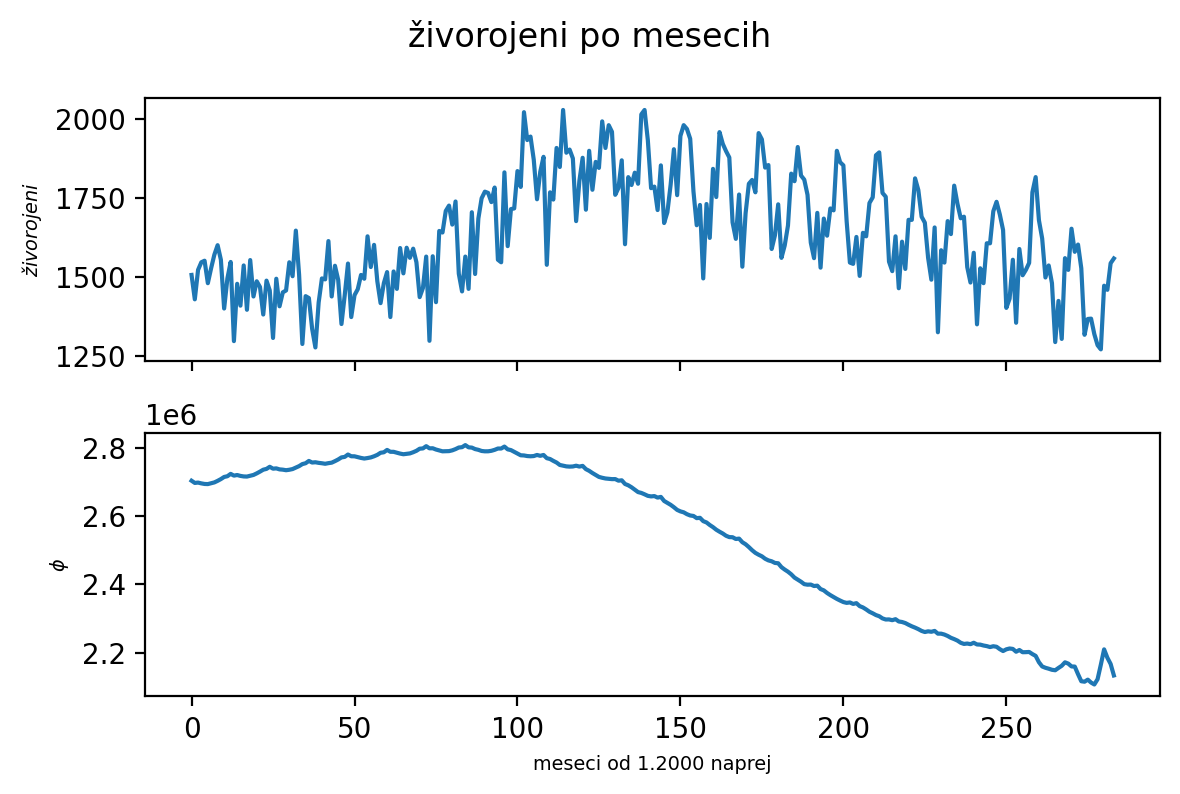

sampling freq: 1.9964788732394367
critical freq: 0.9982394366197184
567 nu


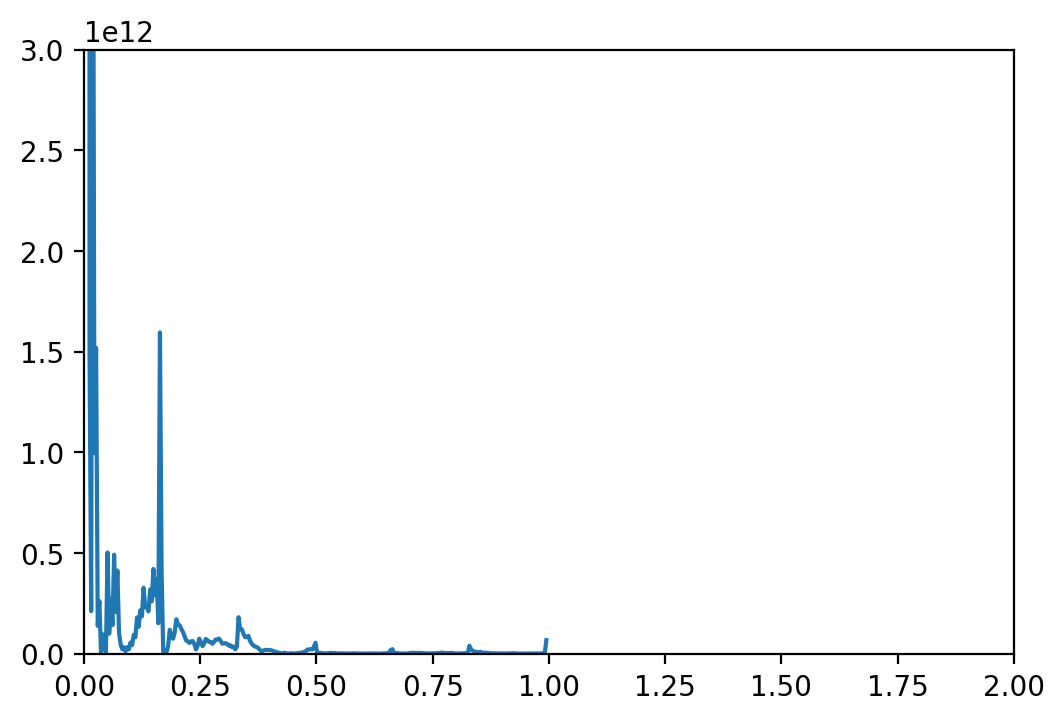

<Figure size 1200x800 with 0 Axes>

In [71]:
# plt.plot(np.datetime64('2000-01') + np.arange(len(mesec)) * np.timedelta64(1, 'M'), mesec)
# plt.show()
# plt.clf()

# plt.plot(np.datetime64('2000-01') + np.arange(len(mesec)) * np.timedelta64(1, 'M'), cor(mesec,mesec)[len(mesec):])
# plt.show()
# plt.clf()

# plt.plot(np.datetime64('2000-01') + np.arange(len(mesec)*2-1) * np.timedelta64(1, 'M'), cor(mesec,mesec)[1:])
# plt.show()
# plt.clf()

# T=np.datetime64('2000-01') + np.arange(len(mesec)*2-1) * np.timedelta64(1, 'M')
# dt = T/len(cor(mesec,mesec)[1:])
# print("sampling freq:",1./dt)
# nuc=1/2/dt
# print("critical freq:",nuc)

# nu= np.linspace(-nuc,nuc,len(cor(mesec,mesec)[1:]),endpoint=False)
# print(len(nu), "nu")

# plt.plot(nu, fft.fftshift(fft.fft(cor(mesec,mesec)[1:])))
# plt.xlim((-2,2))
# plt.show()
# plt.clf()

f, ax = plt.subplots(2,1,sharex=True)


ax[0].plot(np.arange(len(mesec)), mesec)
ax[0].set_ylabel(r'$živorojeni$', size = 'x-small')


T = len(mesec)
dt = 1
print("sampling freq:",1./dt)
nuc=1/2/dt
print("critical freq:",nuc)

nu= np.linspace(-nuc,nuc,T,endpoint=False)
print(len(nu), "nu")

# ax[0].plot(nu, np.abs(fft.fftshift(fft.fft(mesec)))**2)
# ax[0].set_xlim((0.01,1/2))
# ax[0].set_ylim((0.0,10**9*0.3))
# plt.show()




#ax[0].plot(np.arange(len(mesec)*2-1), cor(mesec,mesec)[1:])

ax[1].plot(np.arange(len(mesec)), cor(mesec,mesec)[len(mesec):])
ax[1].set_ylabel(r'$\phi$', size = 'x-small')
ax[1].set_xlabel(r'meseci od 1.2000 naprej', size = 'x-small')
f.suptitle('živorojeni po mesecih')
plt.tight_layout()
#plt.savefig('zivi.png')
plt.show()
plt.clf()

T = len(mesec)
dt = T/len(cor(mesec,mesec)[1:])
print("sampling freq:",1./dt)
nuc=1/2/dt
print("critical freq:",nuc)

nu= np.linspace(-nuc,nuc,len(cor(mesec,mesec)[1:]),endpoint=False)
print(len(nu), "nu")

plt.plot(nu, np.abs(fft.fftshift(fft.fft(cor(mesec,mesec)[1:])))**2)
plt.xlim((0,2))
plt.ylim((0.0,10**13*0.3))
plt.show()
plt.clf()

sampling freq: 1.0
critical freq: 0.5
284 nu


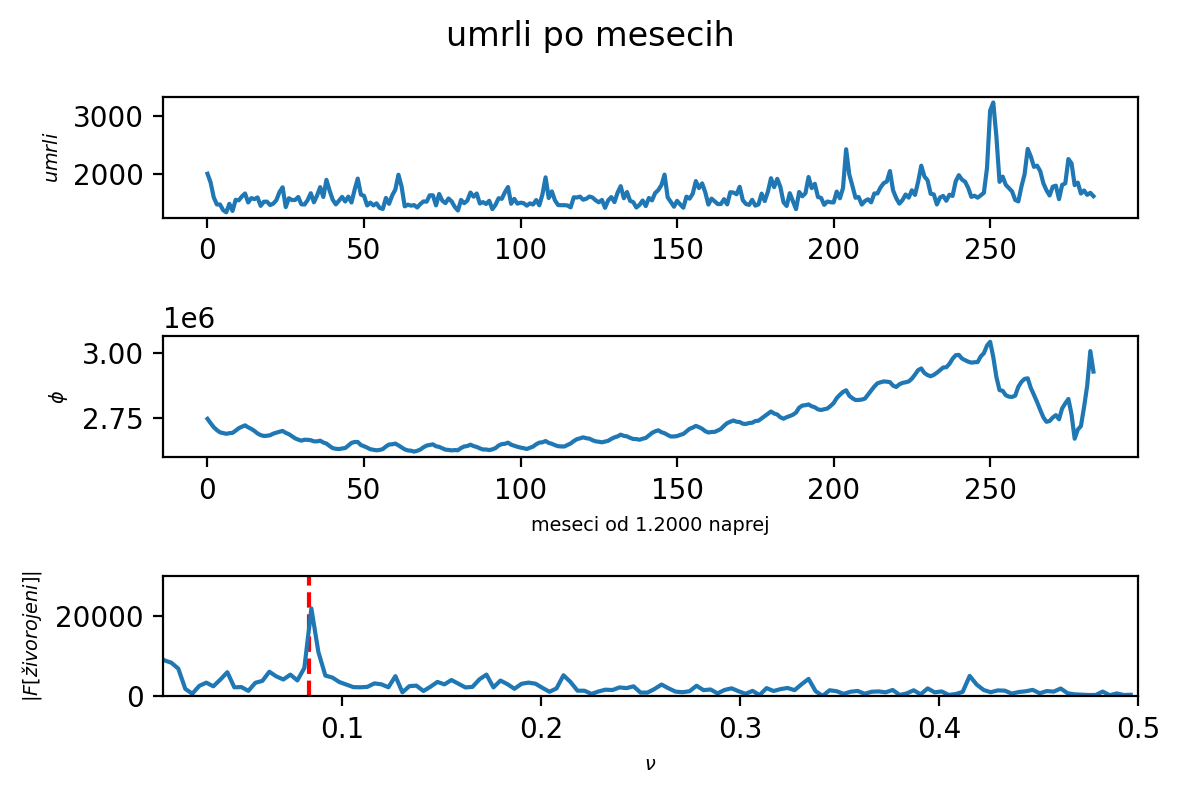

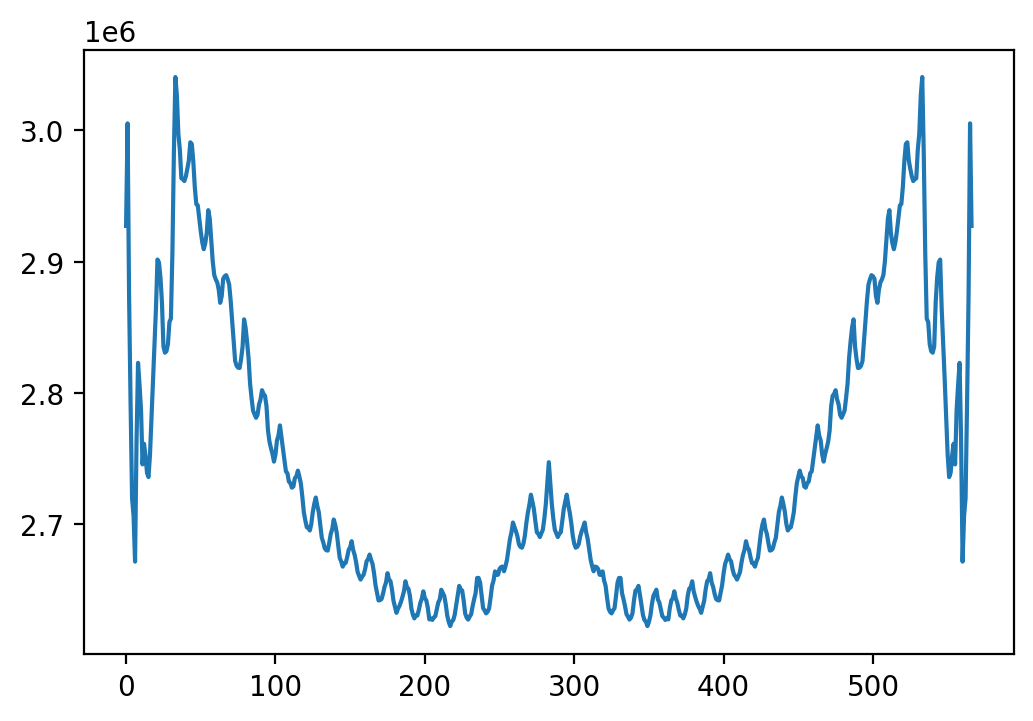

sampling freq: 1.9964788732394367
critical freq: 0.9982394366197184
567 nu


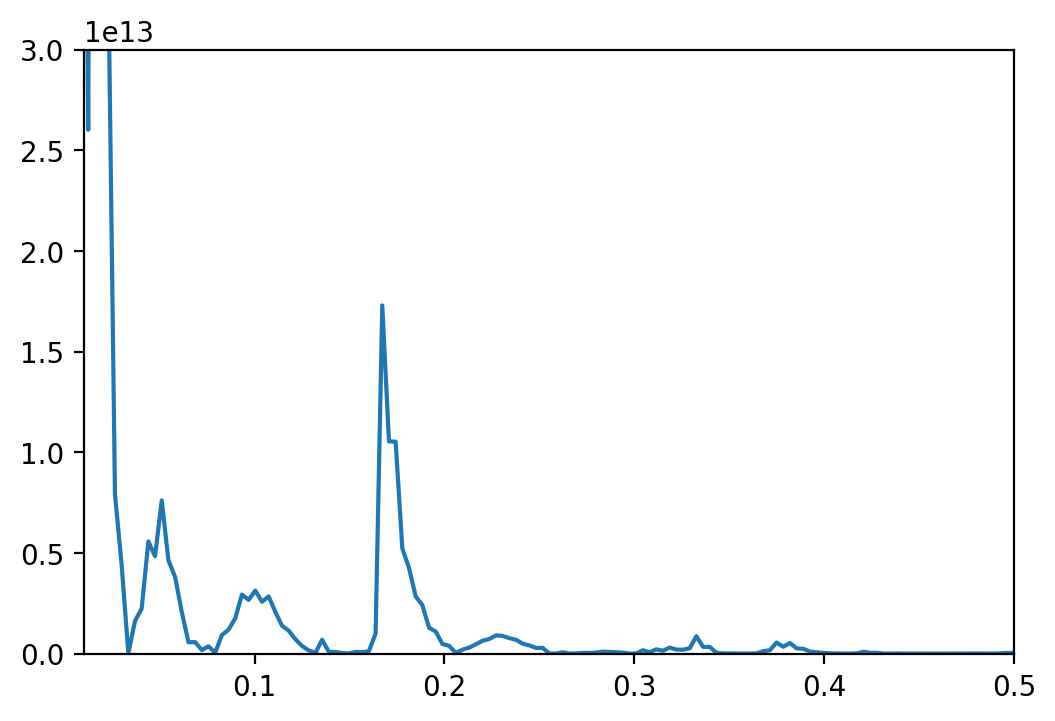

<Figure size 1200x800 with 0 Axes>

In [105]:
f, ax = plt.subplots(3,1, sharex=False)

ax[0].plot(np.arange(len(mesec_smrti)), mesec_smrti)
ax[0].set_ylabel(r'$umrli$', size = 'x-small')


T = len(mesec_smrti)
dt = 1
print("sampling freq:",1./dt)
nuc=1/2/dt
print("critical freq:",nuc)

nu= np.linspace(-nuc,nuc,T,endpoint=False)
print(len(nu), "nu")



ax[1].plot(np.arange(len(mesec_smrti)), cor(mesec_smrti,mesec_smrti)[len(mesec_smrti):])
ax[1].set_ylabel(r'$\phi$', size = 'x-small')
ax[1].set_xlabel(r'meseci od 1.2000 naprej', size = 'x-small')


ax[2].axvline(1/12, color='red', linestyle='--')
ax[2].plot(nu, np.abs(fft.fftshift(fft.fft(mesec_smrti))))
ax[2].set_xlim((0.01,1/2))
#plt.ylim((0.0,10**2*0.8))


ax[2].set_ylabel(r'$|F[živorojeni]|$', size = 'x-small')
ax[2].set_ylim((0.0,30000))
ax[2].set_xlabel(r'$\nu$', size = 'x-small')
f.suptitle('umrli po mesecih')
plt.tight_layout()
#plt.savefig('mrtvi.png')
plt.show()
plt.clf()

plt.plot(np.arange(len(mesec_smrti)*2-1), cor(mesec_smrti,mesec_smrti)[1:])
plt.show()
plt.clf()

